# Morphological Image Processing in Python
### Tanmoy Dasgupta
thetdg@live.com | Assistant Professor | Department of Electrical Engineering | Techno India University, Kolkata

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import PIL
import cv2
import skimage as sk

### Binary Morphology
Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play.

Images can be thought to be a mapping from the integer space $\mathbb{Z^2}$ to $\mathbb{R}$. For a binary image, the mapping reduces to $f: \mathbb{Z^2} \to \{0,1\}$. Every pixel at position $(x,y)\in\mathbb{Z^2}$ is either completely dark $(0)$ or completely bright $(1)$. We shall now introduce two very important set operations.

**Reflection** of a set $B\subseteq\mathbb{Z}^2$ is defined as $\hat{B}  = \{w : w=-b, \forall b\in B\}$. E.g. if $B$ is a set of points of the form $(x,y)$, then $\hat{B}$ can be found by replacing those points by $(-x,-y)$.

**Translation** of a set $B\subseteq\mathbb{Z}^2$ by a point $z=(z_1,z_2)$ is defined as $(B)_z=\{c : c=b+z,\forall b\in B\}$. E.g. if $B$ is a set of points of the form $(x,y)$, then $(B)_z$ can be found by replacig those points by $(x+z_1, y+z_2)$.

Set reflection and translation are employed extensively in morphology to formulate operations based on so-called **structuring elements (SEs)** or **kernels**. SEs are basically small sets or subimages used to probe an image under study for properties of interest. Usually they are often taken in rectangular, circular, elliptical or cross shapes. 

#### Erosion 
With $A, B \subseteq \mathbb{Z}^2$, the erosion of $A$ by $B$ (SE) is defined as $A\ominus B = \{z : (B)_z \subseteq A\}$. In words, this equation indicated that the erosion of $A$ by $B$ is the set of all points $z$ such that $B$, translated by $z$, is contained in $A$. The basic idea of erosion is just like soil erosion only, it erodes away the boundaries of foreground object (Always try to keep foreground in white). So what does it do? The kernel (SE) slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero).

So what happends is that, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises, detach two connected objects etc. Let us use a rectangular SE (kernel) to check this out.

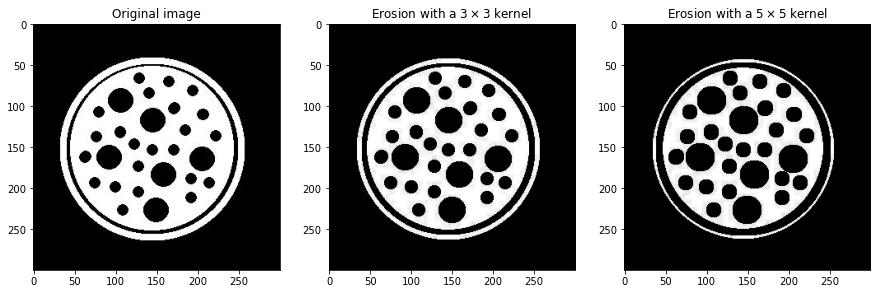

In [2]:
img = cv2.imread('images/binary_circles.jpg',0)
kernel1 = np.ones((3,3), np.uint8)
erosion1 = cv2.erode(img, kernel1, iterations = 1)
kernel2 = np.ones((5,5), np.uint8)
erosion2 = cv2.erode(img, kernel2, iterations = 1)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(erosion1, cmap=plt.cm.gray)
plt.title(r'Erosion with a $3\times3$ kernel')
plt.subplot(133)
plt.imshow(erosion2, cmap=plt.cm.gray)
plt.title(r'Erosion with a $5\times5$ kernel');

#### Dilation
With $A, B \subseteq \mathbb{Z}^2$, the dilation of $A$ by $B$ (SE) is defined as $A\oplus B = \{z:(\hat{B})_z\cap A \ne \phi\}$. In words, the dilation of $A$ by $B$ is the set consisting of all the structuring element _origin locations_ where the reflected and translated $B$ overlaps at least one element of $A$. 

It is just opposite of erosion. Here, a pixel element is $1$ if atleast one pixel under the kernel is $1$. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won’t come back, but our object area increases. It is also useful in joining broken parts of an object.

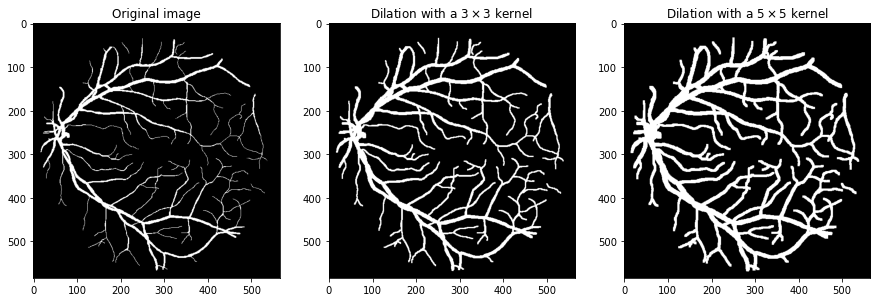

In [3]:
img = cv2.imread('images/binary_retina.png',0)
kernel1 = np.ones((3,3), np.uint8)
dilation1 = cv2.dilate(img, kernel1, iterations = 1)
kernel2 = np.ones((5,5), np.uint8)
dilation2 = cv2.dilate(img, kernel2, iterations = 1)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(dilation1, cmap=plt.cm.gray)
plt.title(r'Dilation with a $3\times3$ kernel')
plt.subplot(133)
plt.imshow(dilation2, cmap=plt.cm.gray)
plt.title(r'Dilation with a $5\times5$ kernel');

#### Opening
The morphological opening of $A$ by $B$ is defined as $A \circ B = (A\ominus B)\oplus B = \cup\{(B)_z:(B)_z\subseteq A\}$, which is nothing but erosion followed by dilation. It is useful in removing noise.

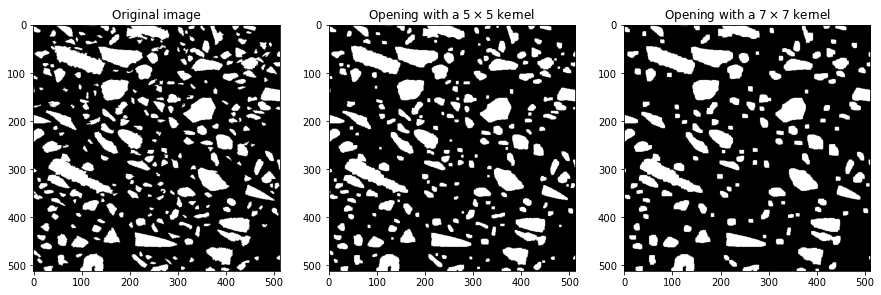

In [4]:
img = cv2.imread('images/binary_sand.png',0)
kernel1 = np.ones((5,5), np.uint8)
opening1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel1)
kernel2 = np.ones((7,7), np.uint8)
opening2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(opening1, cmap=plt.cm.gray)
plt.title(r'Opening with a $5\times5$ kernel')
plt.subplot(133)
plt.imshow(opening2, cmap=plt.cm.gray)
plt.title(r'Opening with a $7\times7$ kernel');

#### Closing
The morphological closing of $A$ by $B$ is defined as $A \bullet B = (A\oplus B)\ominus B$, which is nothing but dilation followed by erosion. It is useful in removing noise. It is useful in closing small holes inside the foreground objects, or small black points on the object.

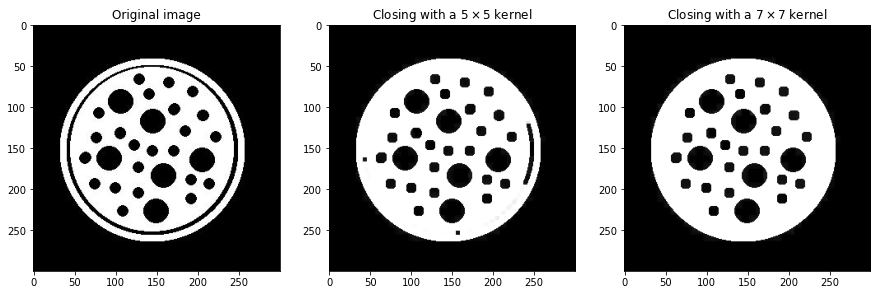

In [5]:
img = cv2.imread('images/binary_circles.jpg',0)
kernel1 = np.ones((5,5), np.uint8)
closing1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
kernel2 = np.ones((7,7), np.uint8)
closing2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(closing1, cmap=plt.cm.gray)
plt.title(r'Closing with a $5\times5$ kernel')
plt.subplot(133)
plt.imshow(closing2, cmap=plt.cm.gray)
plt.title(r'Closing with a $7\times7$ kernel');

#### Morphological Gradient
It is the difference between dilation and erosion of an image.

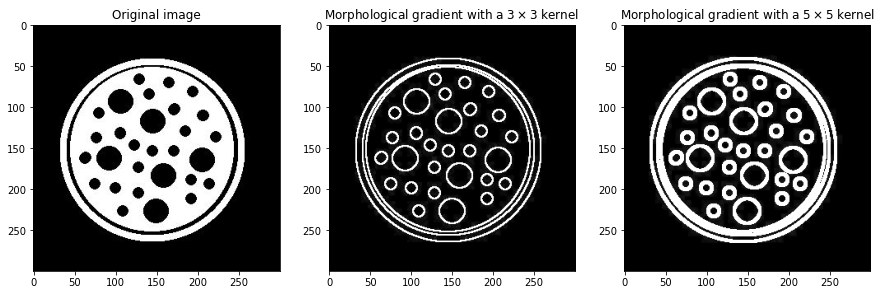

In [6]:
img = cv2.imread('images/binary_circles.jpg',0)
kernel1 = np.ones((3,3), np.uint8)
grad1 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel1)
kernel2 = np.ones((5,5), np.uint8)
grad2 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(grad1, cmap=plt.cm.gray)
plt.title(r'Morphological gradient with a $3\times3$ kernel')
plt.subplot(133)
plt.imshow(grad2, cmap=plt.cm.gray)
plt.title(r'Morphological gradient with a $5\times5$ kernel');

#### Tophat
It is the difference between the original image and its opening.

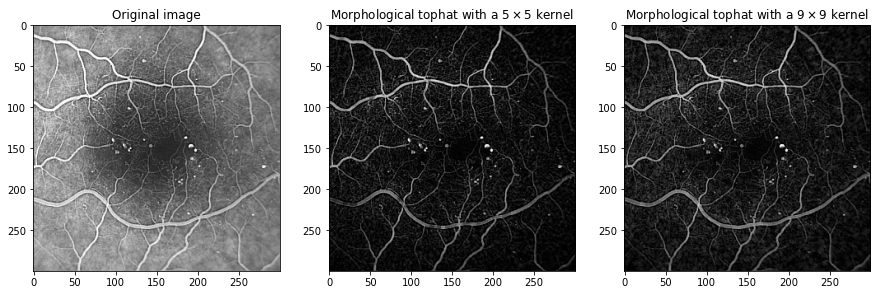

In [7]:
img = cv2.imread('images/binary_angiogram.png',0)
kernel1 = np.ones((5,5), np.uint8)
top1 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel1)
kernel2 = np.ones((9,9), np.uint8)
top2 = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(top1, cmap=plt.cm.gray)
plt.title(r'Morphological tophat with a $5\times5$ kernel')
plt.subplot(133)
plt.imshow(top2, cmap=plt.cm.gray)
plt.title(r'Morphological tophat with a $9\times9$ kernel');

#### Blackhat
It is the difference between the closing of the input image and input image.

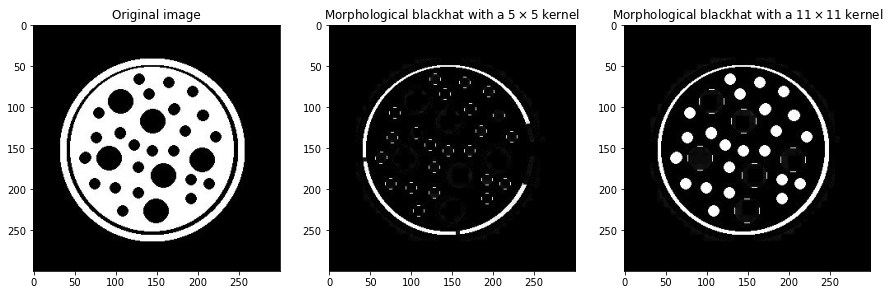

In [8]:
img = cv2.imread('images/binary_circles.jpg',0)
kernel1 = np.ones((5,5), np.uint8)
black1 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel1)
kernel2 = np.ones((11,11), np.uint8)
black2 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original image')
plt.subplot(132)
plt.imshow(black1, cmap=plt.cm.gray)
plt.title(r'Morphological blackhat with a $5\times5$ kernel')
plt.subplot(133)
plt.imshow(black2, cmap=plt.cm.gray)
plt.title(r'Morphological blackhat with a $11\times11$ kernel');

#### SEs of different shapes
OpenCV provides built-in functions for creating SEs of custom shapes like circle, ellipse, cross, etc. They turn out to be useful for dufferent purposes.

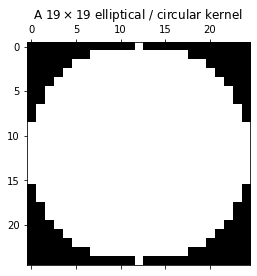

In [9]:
# Rectangular Kernel
rect = cv2.getStructuringElement(cv2.MORPH_RECT,(25,25))
# Elliptical Kernel
ellip = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(25,25))
# Cross-shaped Kernel
cross = cv2.getStructuringElement(cv2.MORPH_CROSS,(25,25))

plt.matshow(ellip, cmap='gray')
plt.title(r'A $19\times 19$ elliptical / circular kernel');

Now check the morphological closing operation with **circular** SEs.

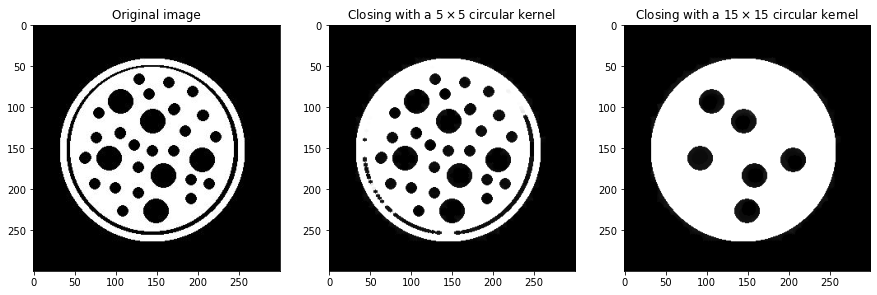

In [10]:
img = cv2.imread('images/binary_circles.jpg',0)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
closing1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
closing2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.subplot(132)
plt.imshow(closing1, cmap='gray')
plt.title(r'Closing with a $5\times5$ circular kernel')
plt.subplot(133)
plt.imshow(closing2, cmap='gray')
plt.title(r'Closing with a $15\times15$ circular kernel');

Another example showing morphological blackhat operation with circular SEs.

In [11]:
img = cv2.imread('images/binary_circles.jpg',0)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
black1 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel1)
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15,15))
black2 = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel2)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.subplot(132)
plt.imshow(black1, cmap='gray')
plt.title(r'Blackhat with a $9\times9$ circular kernel')
plt.subplot(133)
plt.imshow(black2, cmap='gray')
plt.title(r'Blackhat with a $15\times15$ circular kernel')''

SyntaxError: invalid syntax (117609514.py, line 16)